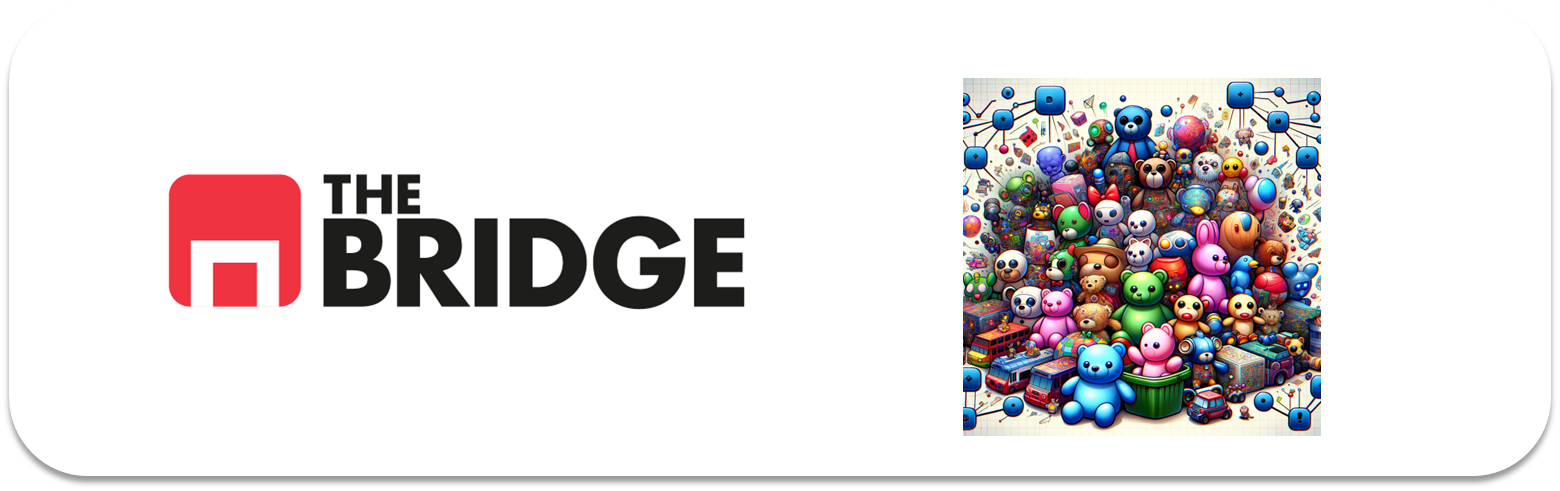

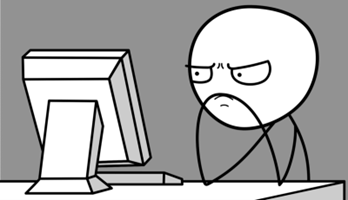

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import v_measure_score, adjusted_rand_score

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferencia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesidad de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es especulativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [112]:
# Cargamos el dataset
file_path = "./data/empowering_drinks.csv"
df = pd.read_csv(file_path, sep="|")

In [113]:
print(df.head())

   Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
0  1.518613               0.232053  1.034819       1.013009  0.251717
1  0.246290              -0.827996  0.733629       0.965242 -0.293321
2  0.196879               1.109334  1.215533       1.395148  0.269020
3  1.691550               0.487926  1.466525       2.334574  1.186068
4  0.295700               1.840403  0.663351      -0.037874 -0.319276


In [114]:
df.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


In [115]:
print(df.isnull().sum())

Azúcares                 0
Vitamínas del grupo B    0
Cafeína                  0
Ácido Cítrico            0
Taurina                  0
dtype: int64


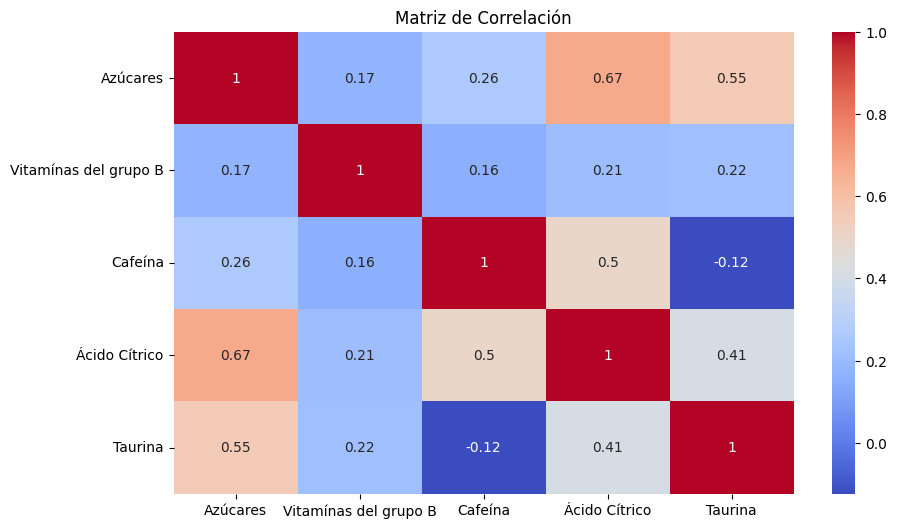

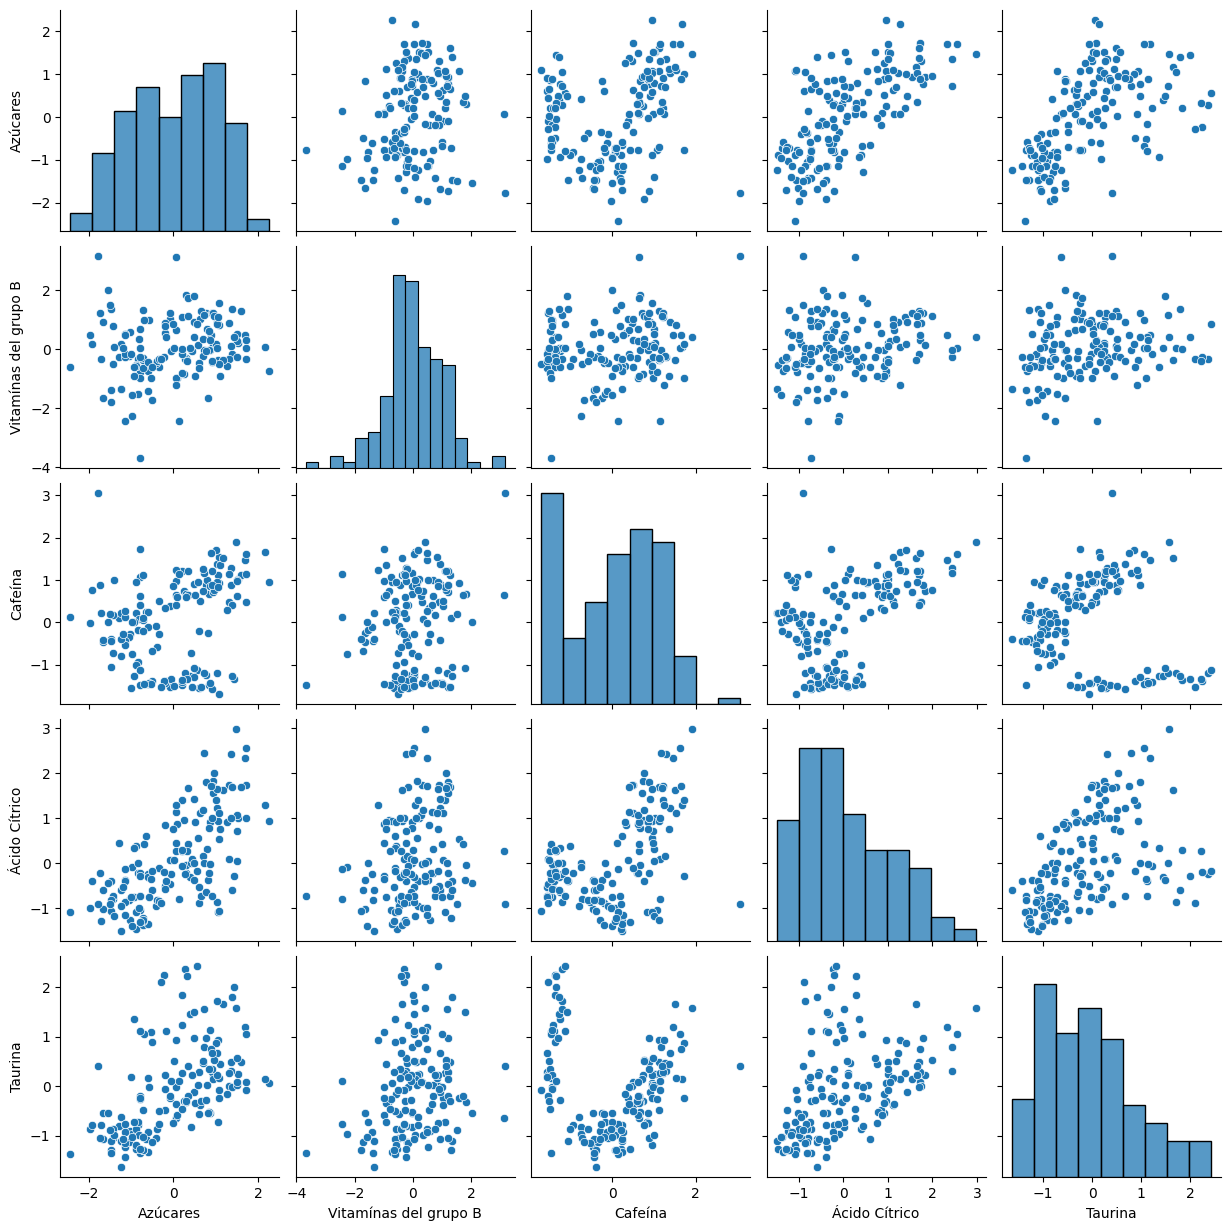

In [116]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

# Scatter plots de pares de variables
sns.pairplot(df)
plt.show()


In [117]:
# Normalizamos las features numéricas
scaler = StandardScaler()
df_escalado = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [118]:
# Probar con diferentes k entre 3 y 5
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_escalado)
    print(f"K={k}, Inercia: {kmeans.inertia_}")

K=3, Inercia: 332.91953684626003
K=4, Inercia: 280.01217487772124
K=5, Inercia: 253.7654522559169


In [119]:
# Entrenamos con el mejor k
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(df_escalado)


In [120]:
# Probar diferentes valores de eps y min_samples
dbscan = DBSCAN(eps=1.2, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(df_escalado)

# Contamos los clusters formados
print(df["DBSCAN_Cluster"].value_counts())

# DBSCAN asigna -1 a los outliers
print(df[df["DBSCAN_Cluster"] == -1])

DBSCAN_Cluster
 0    146
-1      7
Name: count, dtype: int64
     Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina  \
23   0.061000               3.119772  0.653312       0.264653 -0.639377   
47   0.061000              -1.193530  1.245652       1.283691  0.926526   
56  -0.778980              -3.679162 -1.465058      -0.722540 -1.344466   
58   0.826864              -1.632171 -0.240219      -0.372246 -0.544212   
62   0.135116              -2.436346  1.155295      -0.779861  0.104643   
66   1.061565               1.109334  0.834026      -1.072834 -0.725891   
109 -1.779545               3.156325  3.062832      -0.897687  0.407442   

     KMeans_Cluster  DBSCAN_Cluster  
23                1              -1  
47                1              -1  
56                0              -1  
58                0              -1  
62                0              -1  
66                1              -1  
109               1              -1  


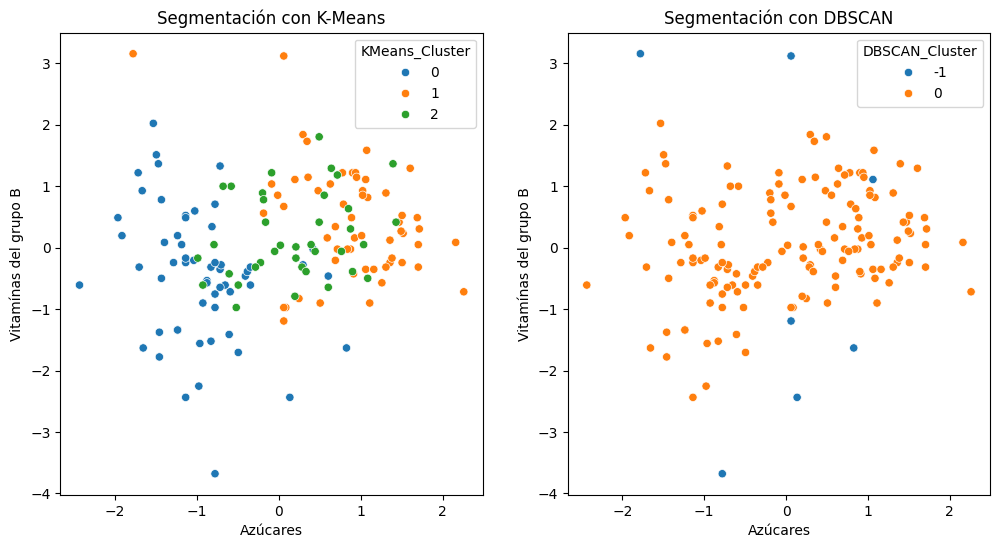

In [121]:
plt.figure(figsize=(12, 6))

# K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df["KMeans_Cluster"], palette="tab10")
plt.title("Segmentación con K-Means")

# DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df["DBSCAN_Cluster"], palette="tab10")
plt.title("Segmentación con DBSCAN")

plt.show()


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [122]:
new_experiments_path = "./data/new_experiments.csv"
df_new = pd.read_csv(new_experiments_path, sep="|")

df_new.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583


In [123]:
# Aplicar la misma normalización que en el modelo original
df_new_escalado = pd.DataFrame(scaler.transform(df_new), columns=df_new.columns)

# Predecimos los clusters usando el modelo entrenado
df_new["KMeans_Cluster"] = kmeans.predict(df_new_escalado)

print(df_new[["KMeans_Cluster"]].value_counts())


KMeans_Cluster
0                 2
1                 2
2                 2
Name: count, dtype: int64


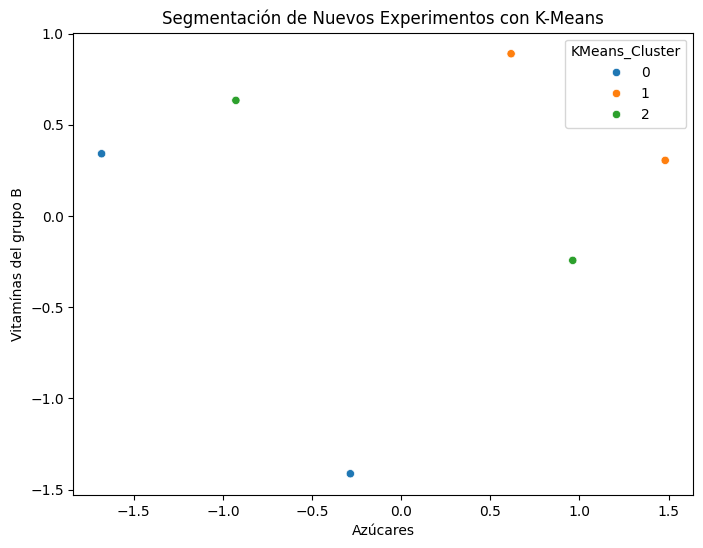

In [124]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new.iloc[:, 0], y=df_new.iloc[:, 1], hue=df_new["KMeans_Cluster"], palette="tab10")
plt.title("Segmentación de Nuevos Experimentos con K-Means")
plt.show()

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.

In [125]:
# Cargamos los datos de clasificación de energización
power_path = "./data/power_results.csv"
df_power = pd.read_csv(power_path, sep="|")

df_power.head()

,class
0,1
1,1
2,1
3,1
4,1


In [127]:
# Unir la segmentación previa con los niveles de energización
df_evaluacion = df.merge(df_power, left_index=True, right_index=True)
df_evaluacion

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,KMeans_Cluster,DBSCAN_Cluster,class
0,1.518613,0.232053,1.034819,1.013009,0.251717,1,0,1
1,0.246290,-0.827996,0.733629,0.965242,-0.293321,1,0,1
2,0.196879,1.109334,1.215533,1.395148,0.269020,1,0,1
3,1.691550,0.487926,1.466525,2.334574,1.186068,1,0,1
4,0.295700,1.840403,0.663351,-0.037874,-0.319276,1,0,1
...,...,...,...,...,...,...,...,...
148,0.493343,0.414820,-1.284344,0.009893,0.969783,2,0,3
149,0.332758,-0.389355,-1.344582,0.280575,2.224236,2,0,3
150,0.209232,0.012732,-1.354622,0.296498,1.834923,2,0,3
151,1.395086,1.365208,-1.274305,-0.595160,1.791666,2,0,3


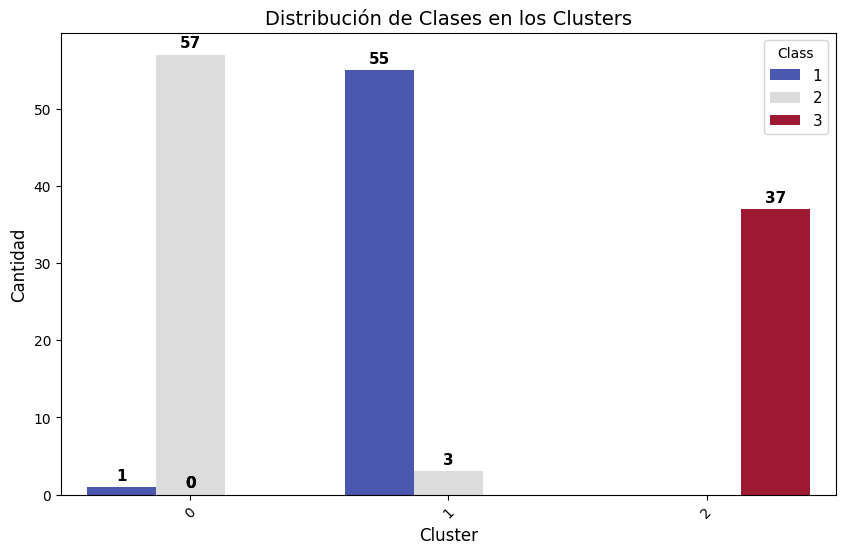

In [128]:
plt.figure(figsize=(10,6))

# Crear el gráfico countplot
ax = sns.countplot(data=df_evaluacion, x="KMeans_Cluster", hue="class", palette="coolwarm")

# Añadir etiquetas encima de cada barra
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,  # Posición en X
            bar.get_height() + 0.5,  # Posición en Y
            int(bar.get_height()),  # Mostrar el valor entero
            ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Personalización del gráfico
plt.title("Distribución de Clases en los Clusters", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.legend(title="Class", fontsize=11)
plt.xticks(rotation=45)  # Ajustar ángulo de etiquetas en X si es necesario

# Mostrar gráfico
plt.show()


In [129]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df_evaluacion["KMeans_Cluster"], df_evaluacion["class"])
tabla_contingencia

class,1,2,3
KMeans_Cluster,,,
0,1,57,0
1,55,3,0
2,0,0,37


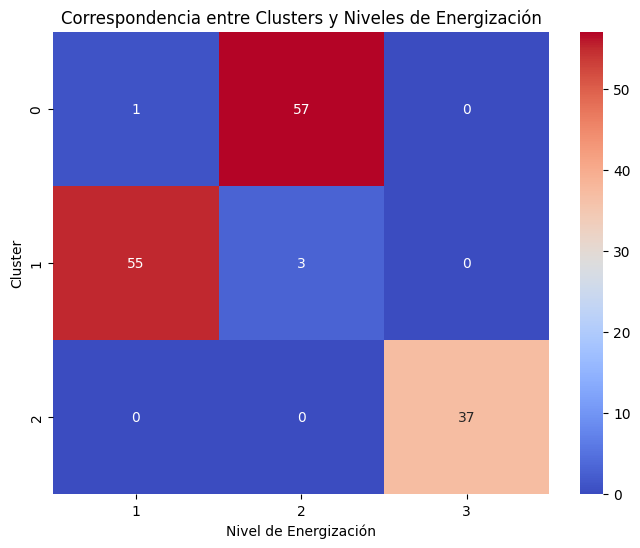

In [130]:
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, annot=True, cmap="coolwarm", fmt="d")
plt.title("Correspondencia entre Clusters y Niveles de Energización")
plt.xlabel("Nivel de Energización")
plt.ylabel("Cluster")
plt.show()


In [131]:
# Calcular métricas de evaluación
v_measure = v_measure_score(df_evaluacion["class"], df_evaluacion["KMeans_Cluster"])
ari = adjusted_rand_score(df_evaluacion["class"], df_evaluacion["KMeans_Cluster"])

print(f"V-Measure Score: {v_measure:.4f}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")


V-Measure Score: 0.8976
Adjusted Rand Index (ARI): 0.9144
